### Data Understanding
This dataset provides a ranking of countries based on their safety for female travelers. It combines data from the Women, Peace and Security Index (WPSI) 2023 and the Women's Danger Index (WDI) 2019.   
The WPSI measures women's safety and security globally, while the WDI focuses on specific factors such as street safety, intentional homicide, and violence against women.  

**Column Name**: **Description**  

Country: Name of the country  

WPSI_2023:	Women, Peace and Security Index score for 2023. Lower scores indicate greater danger.

WDI_Total_2019:	Women's Danger Index total score for 2019. Higher scores indicate greater danger.

WDI_Street_Safety_2019:	Women's Danger Index score for street safety in 2019.

WDI_Intentional_Homicide_2019:	Women's Danger Index score for intentional homicide in 2019.

WDI_Non-Partner_Violence_2019:	Women's Danger Index score for non-partner violence in 2019.

WDI_Intimate_Partner_Violence_2019:	Women's Danger Index score for intimate partner violence in 2019.

WDI_Legal_Discrimination_2019:	Women's Danger Index score for legal discrimination in 2019.

WDI_Global_Gender_Gap_2019:	Women's Danger Index score for global gender gap in 2019.

WDI_Gender_Inequality_2019:	Women's Danger Index score for gender inequality in 2019.

WDI_Attitudes_Toward_Violence_2019:	Women's Danger Index score for attitudes toward violence in 2019.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

In [2]:
dataset = pd.read_csv("Datasets/most-dangerous-countries-for-women-2024.csv")

In [3]:
dataset.head()

,country,MostDangerousCountriesForWomen_WomenPeaceAndSecurityIndex_Score_2023,MostDangerousCountriesForWomen_WomensDangerIndexWDI_TotalScore_2019,MostDangerousCountriesForWomen_WDIStreetSafety_2019,MostDangerousCountriesForWomen_WDIIntentionalHomicide_2019,MostDangerousCountriesForWomen_WDINonPartnerViolence_2019,MostDangerousCountriesForWomen_WDIIntimatePartnerViolence_2019,MostDangerousCountriesForWomen_WDILegalDiscrimination_2019,MostDangerousCountriesForWomen_WDIGlobalGenderGap_2019,MostDangerousCountriesForWomen_WDIGenderInequality_2019,MostDangerousCountriesForWomen_WDIAttitudesTowardViolence_2019
0,India,0.595,541.25,41.0,30.0,19.0,83.0,44.0,79.0,100.0,74.0
1,China,0.700,444.55,23.0,6.0,70.0,86.0,44.0,78.0,29.0,80.0
2,United States,0.823,456.31,51.0,25.0,75.0,81.0,24.0,68.0,36.0,21.0
3,Indonesia,0.700,442.10,37.0,3.0,30.0,66.0,54.0,74.0,86.0,51.0
4,Pakistan,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(176, 11)

#### Renaming the columns

In [8]:
# A dictionary with old and new column names
column_renames = {
    'MostDangerousCountriesForWomen_WomenPeaceAndSecurityIndex_Score_2023': 'WPSI_2023',
    'MostDangerousCountriesForWomen_WomensDangerIndexWDI_TotalScore_2019': 'WDI_Total_2019',
    'MostDangerousCountriesForWomen_WDIStreetSafety_2019': 'WDI_Street_Safety_2019',
    'MostDangerousCountriesForWomen_WDIIntentionalHomicide_2019': 'WDI_Intentional_Homicide_2019',
    'MostDangerousCountriesForWomen_WDINonPartnerViolence_2019': 'WDI_Non_Partner_Violence_2019',
    'MostDangerousCountriesForWomen_WDIIntimatePartnerViolence_2019': 'WDI_Intimate_Partner_Violence_2019',
    'MostDangerousCountriesForWomen_WDILegalDiscrimination_2019': 'WDI_Legal_Discrimination_2019',
    'MostDangerousCountriesForWomen_WDIGlobalGenderGap_2019': 'WDI_Global_Gender_Gap_2019',
    'MostDangerousCountriesForWomen_WDIGenderInequality_2019': 'WDI_Gender_Inequality_2019',
    'MostDangerousCountriesForWomen_WDIAttitudesTowardViolence_2019': 'WDI_Attitudes_Toward_Violence_2019'
}

In [9]:
dataset.rename(columns=column_renames, inplace=True)

In [10]:
dataset.head()

,country,WPSI_2023,WDI_Total_2019,WDI_Street_Safety_2019,WDI_Intentional_Homicide_2019,WDI_Non_Partner_Violence_2019,WDI_Intimate_Partner_Violence_2019,WDI_Legal_Discrimination_2019,WDI_Global_Gender_Gap_2019,WDI_Gender_Inequality_2019,WDI_Attitudes_Toward_Violence_2019
0,India,0.595,541.25,41.0,30.0,19.0,83.0,44.0,79.0,100.0,74.0
1,China,0.700,444.55,23.0,6.0,70.0,86.0,44.0,78.0,29.0,80.0
2,United States,0.823,456.31,51.0,25.0,75.0,81.0,24.0,68.0,36.0,21.0
3,Indonesia,0.700,442.10,37.0,3.0,30.0,66.0,54.0,74.0,86.0,51.0
4,Pakistan,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             176 non-null    object 
 1   WPSI_2023                           176 non-null    float64
 2   WDI_Total_2019                      50 non-null     float64
 3   WDI_Street_Safety_2019              50 non-null     float64
 4   WDI_Intentional_Homicide_2019       50 non-null     float64
 5   WDI_Non_Partner_Violence_2019       50 non-null     float64
 6   WDI_Intimate_Partner_Violence_2019  50 non-null     float64
 7   WDI_Legal_Discrimination_2019       50 non-null     float64
 8   WDI_Global_Gender_Gap_2019          50 non-null     float64
 9   WDI_Gender_Inequality_2019          50 non-null     float64
 10  WDI_Attitudes_Toward_Violence_2019  50 non-null     float64
dtypes: float64(10), object(1)
memory usage: 15.3+

In [14]:
dataset.describe()

,WPSI_2023,WDI_Total_2019,WDI_Street_Safety_2019,WDI_Intentional_Homicide_2019,WDI_Non_Partner_Violence_2019,WDI_Intimate_Partner_Violence_2019,WDI_Legal_Discrimination_2019,WDI_Global_Gender_Gap_2019,WDI_Gender_Inequality_2019,WDI_Attitudes_Toward_Violence_2019
count,176.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.680330,413.011600,53.740000,15.560000,39.740000,51.840000,36.440000,70.580000,42.280000,33.980000
std,0.148371,122.215655,21.562259,18.417117,24.287235,21.386969,20.111079,13.800458,28.747344,22.232987
min,0.286000,212.040000,9.000000,3.000000,6.000000,14.000000,15.000000,41.000000,7.000000,7.000000
25%,0.581500,312.602500,40.250000,6.000000,23.750000,32.250000,22.000000,61.500000,17.000000,20.000000
50%,0.691500,394.535000,54.000000,9.500000,30.000000,48.000000,30.000000,71.500000,38.500000,24.000000
75%,0.796500,514.900000,68.000000,15.500000,62.000000,65.500000,43.250000,78.750000,64.000000,51.750000
max,0.932000,771.820000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Data Cleaning

In [15]:
dataset.duplicated().sum()

0

In [12]:
dataset.isnull().sum()

country                                 0
WPSI_2023                               0
WDI_Total_2019                        126
WDI_Street_Safety_2019                126
WDI_Intentional_Homicide_2019         126
WDI_Non_Partner_Violence_2019         126
WDI_Intimate_Partner_Violence_2019    126
WDI_Legal_Discrimination_2019         126
WDI_Global_Gender_Gap_2019            126
WDI_Gender_Inequality_2019            126
WDI_Attitudes_Toward_Violence_2019    126
dtype: int64

In [16]:
# Copying the dataset, just in-case if the original is needed later on
dataset_copy = dataset.copy()

In [19]:
numeric_features = dataset_copy.select_dtypes(include=[float, int])

In [20]:
corr_matrix = numeric_features.corr().T

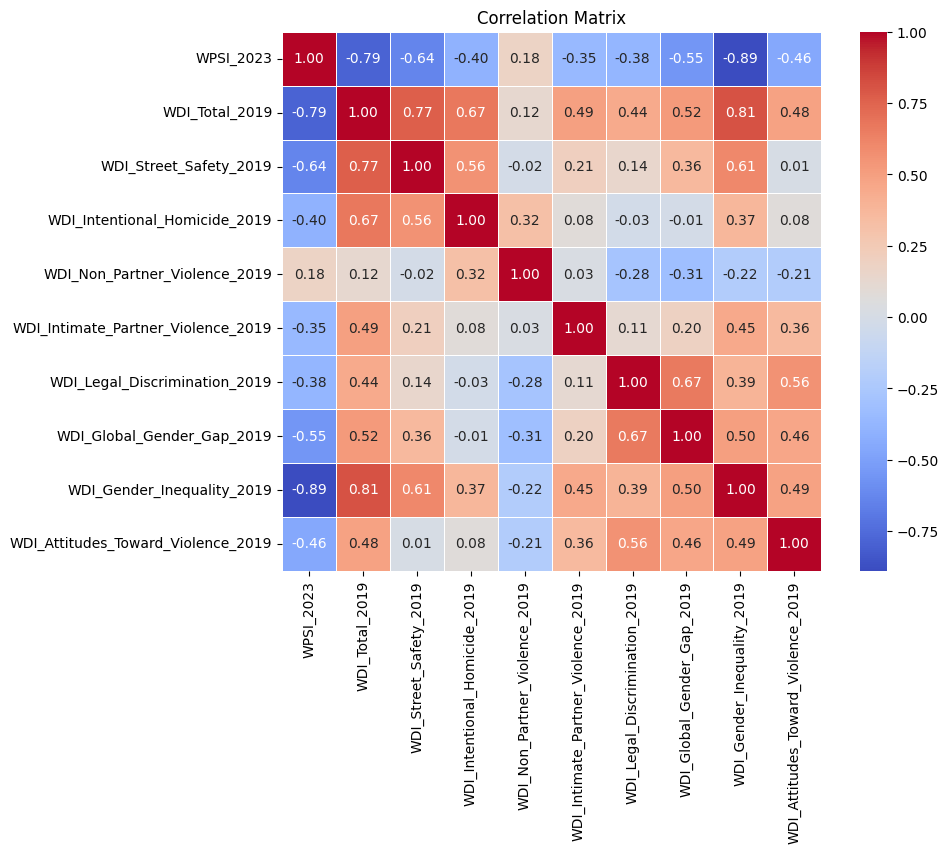

In [25]:
# Visualizing the correlation matrix
plt.figure(figsize=(10, 7))

# Heatmatp
sns.heatmap(corr_matrix, annot=True, fmt="0.2f", cmap="coolwarm", square=True, linewidths=0.5)
""" 
annot=True: Displays the correlation coefficient in each cell.
fmt=".2f": Formats the correlation coefficient to 2 decimal places.
cmap="coolwarm": Sets the color map. You can use other color maps like 'viridis', 'YlGnBu', etc.
square=True: Makes each cell square-shaped for a better visual balance.
linewidths=0.5: Adds space between cells for clearer separation.
"""
# Heatmap title
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Skim summary of the dataset
skim(dataset_copy)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 176    │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ WPSI_2023             │    0 │     0 │ 0.6803 │ 0.1484 │ 0.286 │ 0.5815 │ 0.6915 │ 0.7965 │ 0.932 │ ▁▃▅▇▆▆ │  │
│ │ WDI_Total_2019        │  126 │ 71.59 │    413 │  122.2 │   212 │  312.6 │  394.5 │  514.9 │ 771.8 │ ▇▇▇▇▁▁ │  │
│ │ WDI_Street_Safety_201 │  126 │ 71.59 │  53.74 │  21.56 │     9 │  40.25 │     54 │     68 │   100 │ ▃▃▇▇▃▃ │  │
│ │ 9                     │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Intentional_Homic │  126 │ 71.59 │  15.56 │  18.42 │     3 │      6 │    9.5 │   15.5 │   100 │   ▇▁   │  │
│ │ ide_2019              │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Non_Partner_Viole │  126 │ 71.59 │  39.74 │  24.29 │     6 │  23.75 │     30 │     62 │   100 │ ▃▇▂▂▃▁ │  │
│ │ nce_2019              │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Intimate_Partner_ │  126 │ 71.59 │  51.84 │  21.39 │    14 │  32.25 │     48 │   65.5 │   100 │ ▁▇▆▅▃▂ │  │
│ │ Violence_2019         │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Legal_Discriminat │  126 │ 71.59 │  36.44 │  20.11 │    15 │     22 │     30 │  43.25 │   100 │ ▇▆▂▁▁▁ │  │
│ │ ion_2019              │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Global_Gender_Gap │  126 │ 71.59 │  70.58 │   13.8 │    41 │   61.5 │   71.5 │  78.75 │   100 │ ▂▃▅▇▃▂ │  │
│ │ _2019                 │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Gender_Inequality │  126 │ 71.59 │  42.28 │  28.75 │     7 │     17 │   38.5 │     64 │   100 │ ▇▃▃▃▂▃ │  │
│ │ _2019                 │      │       │        │        │       │        │        │        │       │        │  │
│ │ WDI_Attitudes_Toward_ │  126 │ 71.59 │  33.98 │  22.23 │     7 │     20 │     24 │  51.75 │   100 │ ▇▃▃▁▁  │  │
│ │ Violence_2019         │      │       │        │        │       │        │        │        │       │        │  │
│ └───────────────────────┴──────┴───────┴────────┴────────┴───────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━

#### First way of handling missing values 
##### Drop rows with any NaN values

In [29]:
df_cpy1 = dataset_copy.copy()

In [30]:
df_cpy1.shape

(176, 11)

In [31]:
df_cpy1 = df_cpy1.dropna()

In [32]:
df_cpy1.shape

(50, 11)

#### Second way of handling missig values
##### Fill with the mean value
**When to Use Mean Imputation**  
Using the mean to fill missing values works well in cases where:

1. The missing data is random (missing at random).
2. The dataset has enough data points such that the mean is representative.
3. The data distribution is approximately normal (not skewed), as using the mean in a skewed distribution may introduce some bias.

In [36]:
df_cpy2 = dataset_copy.copy()

<Axes: >

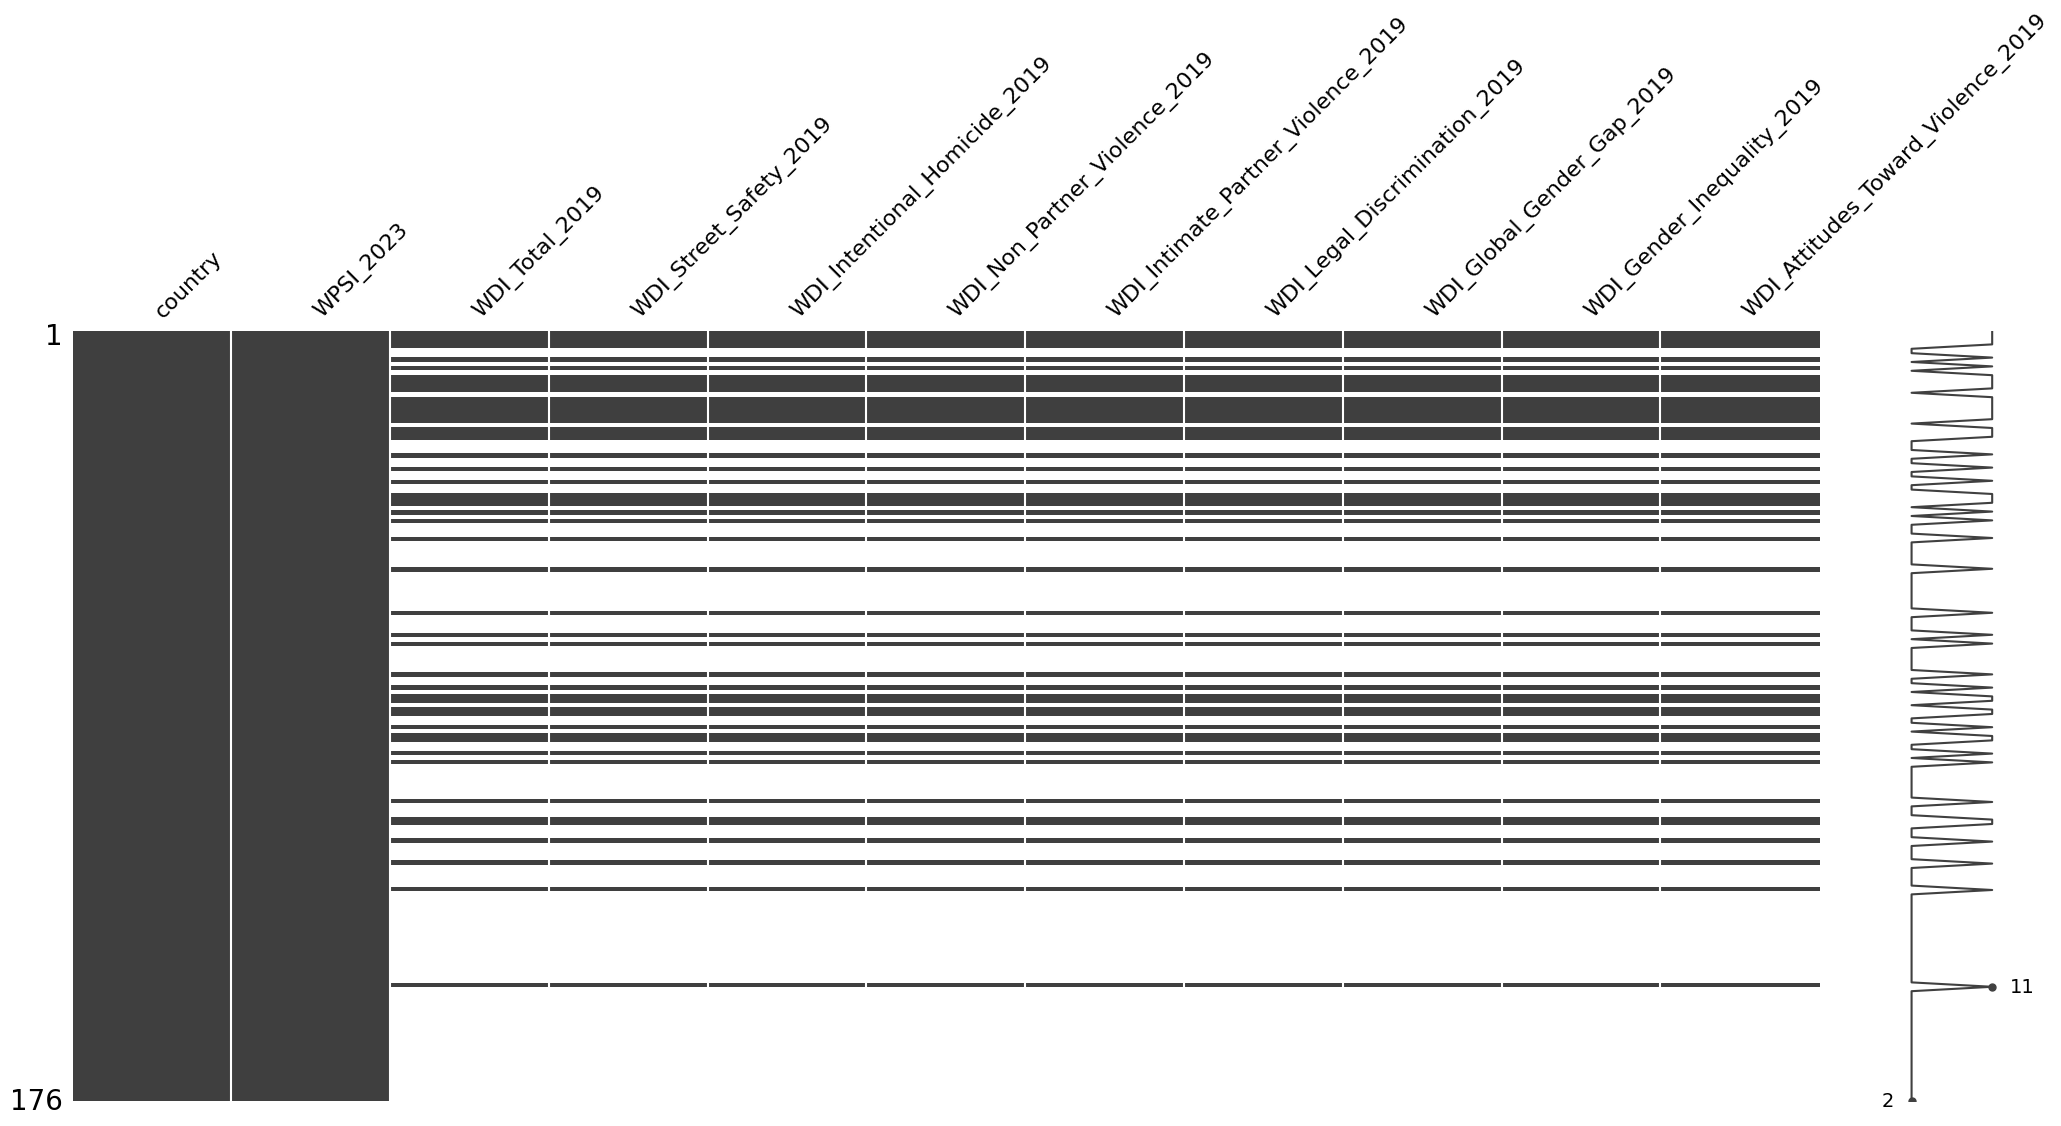

In [37]:
# Checking if the missing data is random
msno.matrix(df_cpy2)

<Axes: >

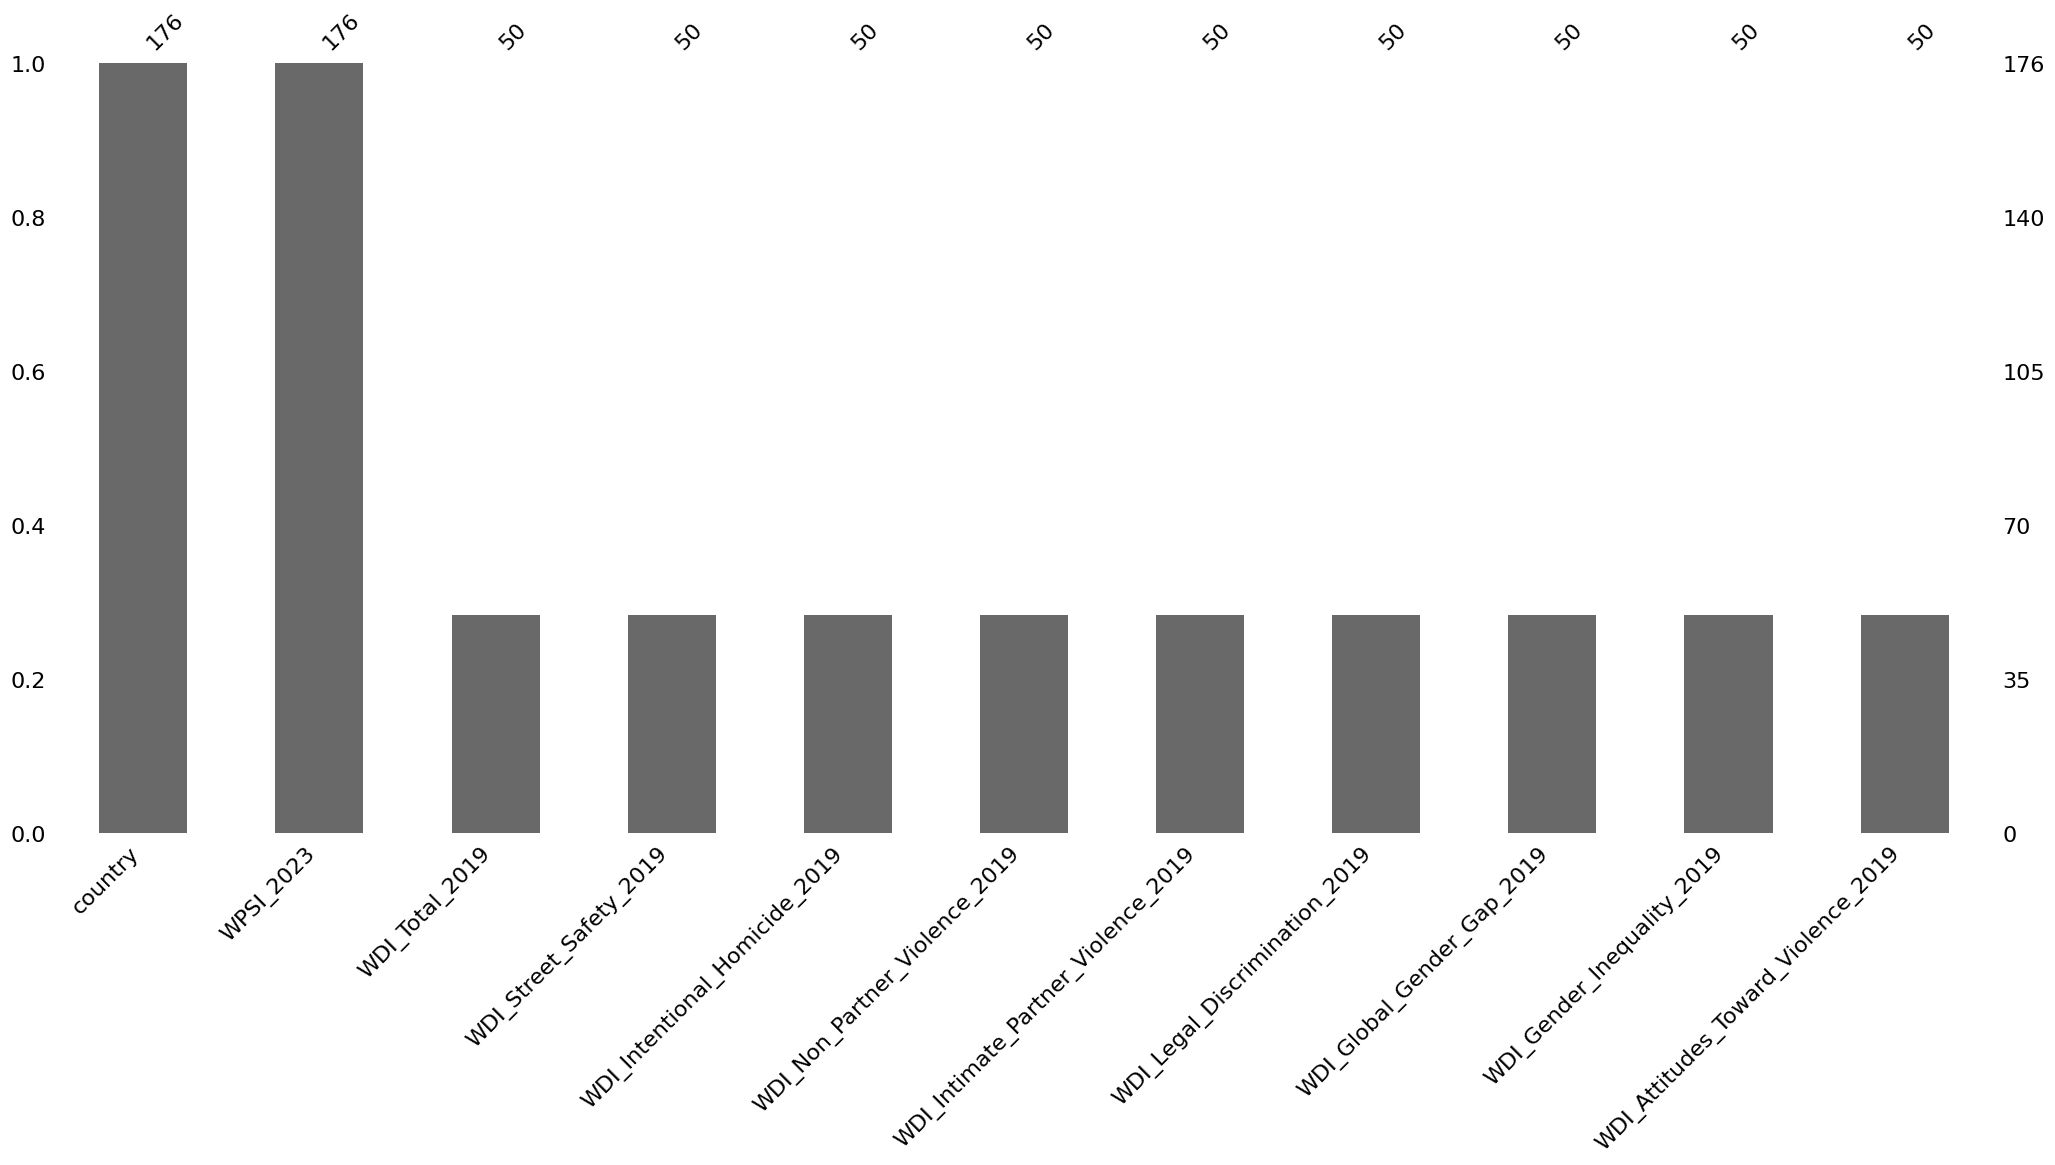

In [39]:
msno.bar(df_cpy2)

In [ ]:
# Check skewness of each numerical column
print(numeric_features.skew())

WPSI_2023                            -0.287829
WDI_Total_2019                        0.468526
WDI_Street_Safety_2019                0.107036
WDI_Intentional_Homicide_2019         3.054359
WDI_Non_Partner_Violence_2019         0.776450
WDI_Intimate_Partner_Violence_2019    0.363699
WDI_Legal_Discrimination_2019         1.502504
WDI_Global_Gender_Gap_2019            0.087735
WDI_Gender_Inequality_2019            0.452335
WDI_Attitudes_Toward_Violence_2019    1.006050
dtype: float64


> If a column has a skewness value beyond ±0.5 (a general rule of thumb), it may be better to use the median for imputation instead of the mean.